In [200]:
from sklearn.cluster import KMeans # algoritmo de KMenas el que ayuda a clasificar la data
from sklearn import datasets # para pode traer el set de datos de iris
from sklearn import metrics # para poder ver que tan bien aprendio el algoritmo de KMeans
import matplotlib.pyplot as plt # para hacer graficas
import pandas as pd
import mglearn #  para pra procesar la data y ver las graficas
from sklearn.decomposition import PCA
%matplotlib inline 

import numpy as np
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn import svm, datasets

In [201]:
iris=datasets.load_iris() # se pasa el set de datos a la variabe iris

In [202]:
X = iris.data #caracteristicas
XSepal = iris.data[:, :2] # secargan solo los datos del sepalo
XPetal = iris.data[:, 2:4] # se cargan solo los datos del petalo
Y = iris.target #etiquetas

In [203]:
X.shape #muestra el tamano de X (filas,columnas)

(150, 4)

In [204]:
Y[:5] # muestra los primeros 5 elementos de y, target_name

array([0, 0, 0, 0, 0])

In [205]:
iris.keys() #muestra como esta constituido el set de iris

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [206]:
iris['target_names'] # muestra los target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [207]:
iris['feature_names'] #muestra los features_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [208]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width','Petal Length','Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])

In [209]:
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [210]:
y.head(5)

,Target
0,0
1,0
2,0
3,0
4,0


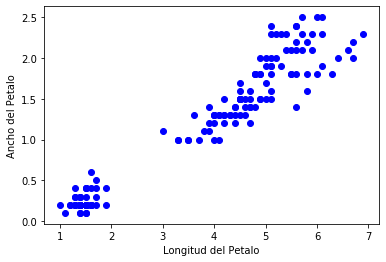

In [211]:
plt.scatter(x['Petal Length'],x['Petal Width'], c='blue') 
plt.xlabel('Longitud del Petalo', fontsize=10)
plt.ylabel('Ancho del Petalo', fontsize= 10)
plt.show()

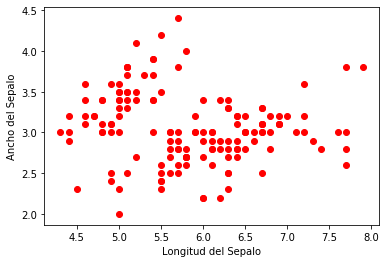

In [212]:
plt.scatter(x['Sepal Length'],x['Sepal Width'], c='red')
plt.xlabel('Longitud del Sepalo', fontsize=10)
plt.ylabel('Ancho del Sepalo', fontsize= 10)
plt.show()

In [213]:
km = KMeans(n_clusters=3,max_iter=1000) # la variable km recibe el algoritmo de KMeans, n_clusters=2 es en cuantos grupos queremos que clasifique el set de datos 

In [214]:
km.fit(X) #se entrena la variabel con X

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [215]:
predicciones=km.predict(X) # esta variable va a tener las predicciones de a que grupo cree q pertence 

In [216]:
predicciones #mustra las prediccione que hizo el algoritmo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [217]:
score = metrics.adjusted_rand_score(Y, predicciones) # metodo metrics para ver que tan bien aprendio

In [218]:
print (score)

0.7302382722834697


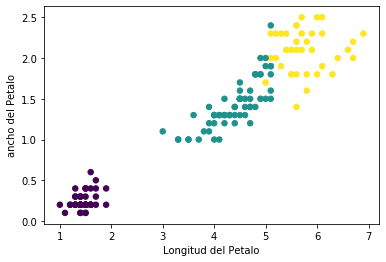

In [219]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = predicciones, s=30)
plt.xlabel('Longitud del Petalo', fontsize =10)
plt.ylabel('ancho del Petalo', fontsize=10)
plt.show()

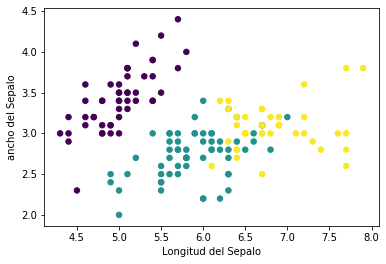

In [220]:
plt.scatter(x['Sepal Length'], x['Sepal Width'], c = predicciones, s=30)
plt.xlabel('Longitud del Sepalo', fontsize =10)
plt.ylabel('ancho del Sepalo', fontsize=10)
plt.show()

de aqui en adelante hare una prueba con pca

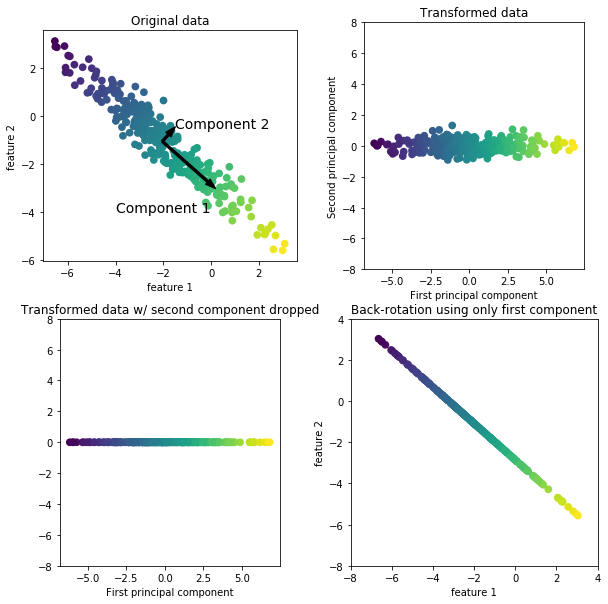

In [221]:
mglearn.plots.plot_pca_illustration() # cargar ejemplo de pca

In [222]:
pca = PCA(n_components=2) # la variable pca recive la funcion pca con 2 comnentes, el compemnte 1 el de mayor varianza y el ortogonal
pca.fit(iris.data) # le damos la data 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [223]:
transformada = pca.transform(iris.data) # genera una transformacion y que lo pase a la variable transformada

In [224]:
print(iris.data.shape) # set de datos original
print(transformada.shape) # forma de la data transformada

(150, 4)
(150, 2)


Text(0, 0.5, 'PCA 2')

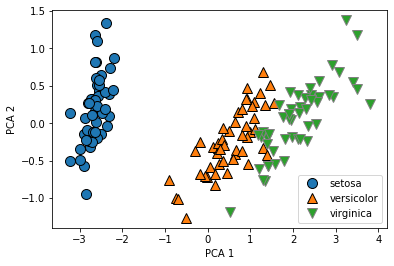

In [225]:
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], iris.target) # graficar la data transformada 
plt.legend(iris.target_names,loc='best')
plt.xlabel('PCA 1') # el componete pricipal se va al eje x
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

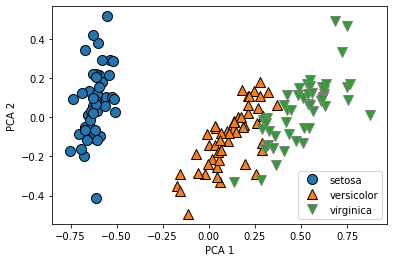

In [226]:
from sklearn.preprocessing import MinMaxScaler # funcion minmaxscaler pone todo en una escalal similar de 0 a 1
escala = MinMaxScaler() # escala recibe al modelo  minmaxscaler
escala.fit(iris.data)
escalada=escala.transform(iris.data) # toma toda la data y lo escala de 0 a 1
pca.fit(escalada)
transformada = pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], iris.target)
plt.legend(iris.target_names,loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [227]:
escalada # muestra la data escalada

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [228]:
iris.data #muestra la data antes de ser escalada

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

de aqui en adelante se hace PCA con 3 componentes

In [229]:
np.random.seed(5)

In [230]:
centers = [[1, 1], [-1, -1], [1, -1]]


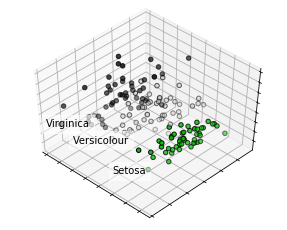

In [231]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(Xpca[Y == label, 0].mean(),
              Xpca[Y == label, 1].mean() + 1.5,
              Xpca[Y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
Ypca = np.choose(Y, [1, 2, 0]).astype(np.float)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=Ypca, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

De aqui en adelante son graficas 

C:\Users\SOATEC\anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


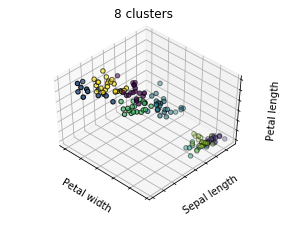

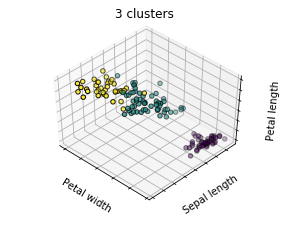

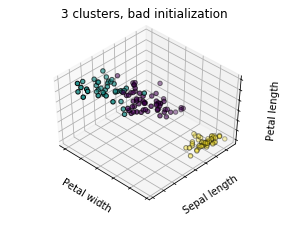

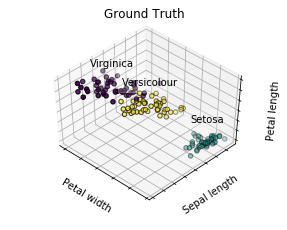

In [232]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[Y == label, 3].mean(),
              X[Y == label, 0].mean(),
              X[Y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
Y = np.choose(Y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=Y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

De aqui en adelante se aplica SVM whit custom kermel